In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.backend as K
from keras.callbacks import ModelCheckpoint
import importlib as imp

# custom module for capstone 2
import cap2tools as c2t
imp.reload(c2t)

<module 'cap2tools' from 'C:\\Users\\Nils\\Documents\\GitHub\\Springboard-Capstone-2-local-yelp\\cap2tools.py'>

In [2]:
# configure GPU memory usage by tensorflow
config = K.tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.80
K.tensorflow_backend.set_session(K.tf.Session(config=config))

In [3]:
# define paths to image directories
photos_path = 'H:/springboard/other_data/yelp/Photos/final_photos/'
train_path = photos_path + 'train'
valid_path = photos_path + 'val'

# build image generators to feed CNN
train_batches, valid_batches = c2t.build_data_gens([train_path, valid_path])

Found 220992 images belonging to 5 classes.
Found 20000 images belonging to 5 classes.


In [4]:
# build model
model = c2t.build_VGG16(width=800, 
                        new_weights=False, 
                        trainable=True, 
                        learning_rate=0.0001, 
                        dropout1=0, 
                        dropout2=0.1)

In [5]:
# define callback
checkpointer = ModelCheckpoint('final_model.h5', 
                               monitor='val_loss', 
                               verbose=1, 
                               save_best_only=True)

# train first five epochs of model
n_epochs = 5

history = model.fit_generator(train_batches, 
                              validation_data=valid_batches,
                              epochs=n_epochs, 
                              verbose=1, 
                              callbacks=[checkpointer])

Epoch 1/5
27624/27624 [==============================] - 6054s 219ms/step - loss: 0.2532 - acc: 0.9151 - val_loss: 0.1973 - val_acc: 0.9304

Epoch 00001: val_loss improved from inf to 0.19728, saving model to final_model.h5
Epoch 2/5
27624/27624 [==============================] - 6021s 218ms/step - loss: 0.1957 - acc: 0.9319 - val_loss: 0.1827 - val_acc: 0.9364

Epoch 00002: val_loss improved from 0.19728 to 0.18266, saving model to final_model.h5
Epoch 3/5
27624/27624 [==============================] - 6032s 218ms/step - loss: 0.1838 - acc: 0.9362 - val_loss: 0.1750 - val_acc: 0.9387

Epoch 00003: val_loss improved from 0.18266 to 0.17504, saving model to final_model.h5
Epoch 4/5
27624/27624 [==============================] - 6051s 219ms/step - loss: 0.1773 - acc: 0.9386 - val_loss: 0.1703 - val_acc: 0.9406

Epoch 00004: val_loss improved from 0.17504 to 0.17035, saving model to final_model.h5
Epoch 5/5
27624/27624 [==============================] - 6029s 218ms/step - loss: 0.1727 - a

In [6]:
history.history

{'val_loss': [0.19728139929915778,
  0.18265847071080935,
  0.1750368343205919,
  0.17034693631324335,
  0.16709436277593048],
 'val_acc': [0.9304, 0.93635, 0.93875, 0.94065, 0.9418],
 'loss': [0.25324471081322875,
  0.19565610455911148,
  0.18380035248226162,
  0.17732823604556275,
  0.1727181471390913],
 'acc': [0.9151055241818709,
  0.9318708369533739,
  0.9361967854039965,
  0.9386086374167391,
  0.9399661526209093]}

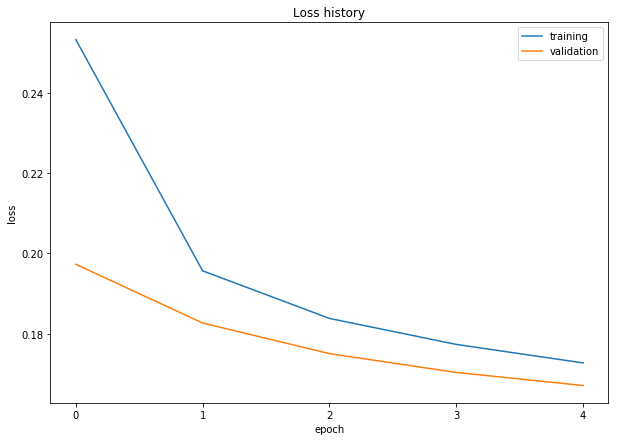

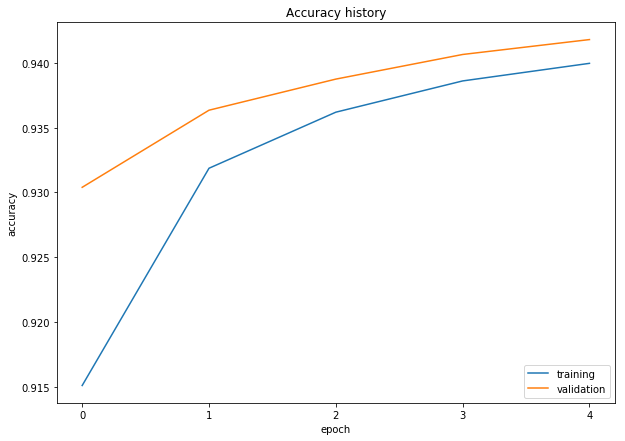

In [17]:
n_epochs = 5

# plot loss history
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss history')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(range(n_epochs))
plt.legend(loc='upper right')
plt.show()

# plot acc history
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(history.history['acc'], label='training')
plt.plot(history.history['val_acc'], label='validation')
plt.title('Accuracy history')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(range(n_epochs))
plt.legend(loc='lower right')
plt.show()

In [20]:
model_paths = {'model': 'final_model.h5'}

model_metrics = c2t.eval_models(model_paths, valid_path)

Building image generator...
Found 20000 images belonging to 5 classes.
Loading model final_model.h5
Evaluating model final_model.h5
Evaluation complete.



In [27]:
model_metrics = model_metrics['model']

In [28]:
print(model_metrics['pcr'])
print(model_metrics['mpcr'])
model_metrics['cm']

[0.67097701 0.98859316 0.92466063 0.47252747 0.75410834]
0.7621733223609561


[[467, 155, 63, 1, 10],
 [77, 13000, 66, 1, 6],
 [27, 122, 4087, 4, 180],
 [1, 13, 16, 43, 18],
 [6, 23, 373, 2, 1239]]

In [29]:
model_metrics

{'loss': 0.16709436188172816,
 'acc': 0.9418,
 'cm': [[467, 155, 63, 1, 10],
  [77, 13000, 66, 1, 6],
  [27, 122, 4087, 4, 180],
  [1, 13, 16, 43, 18],
  [6, 23, 373, 2, 1239]],
 'pcr': array([0.67097701, 0.98859316, 0.92466063, 0.47252747, 0.75410834]),
 'mpcr': 0.7621733223609561}